# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Fixing random state for reproducibility
np.random.seed(2360873)

In [4]:
df = pd.read_csv('profissao.csv')
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [5]:
#Sendo algumas variáveis para serem avaliadas, ficaria mais fácil agrupá-las para depois analisar utilizando o 'for'

varQualitativas = df.select_dtypes('object','boolean').columns
varQualitativas

Index(['data_ref', 'sexo', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia'],
      dtype='object')

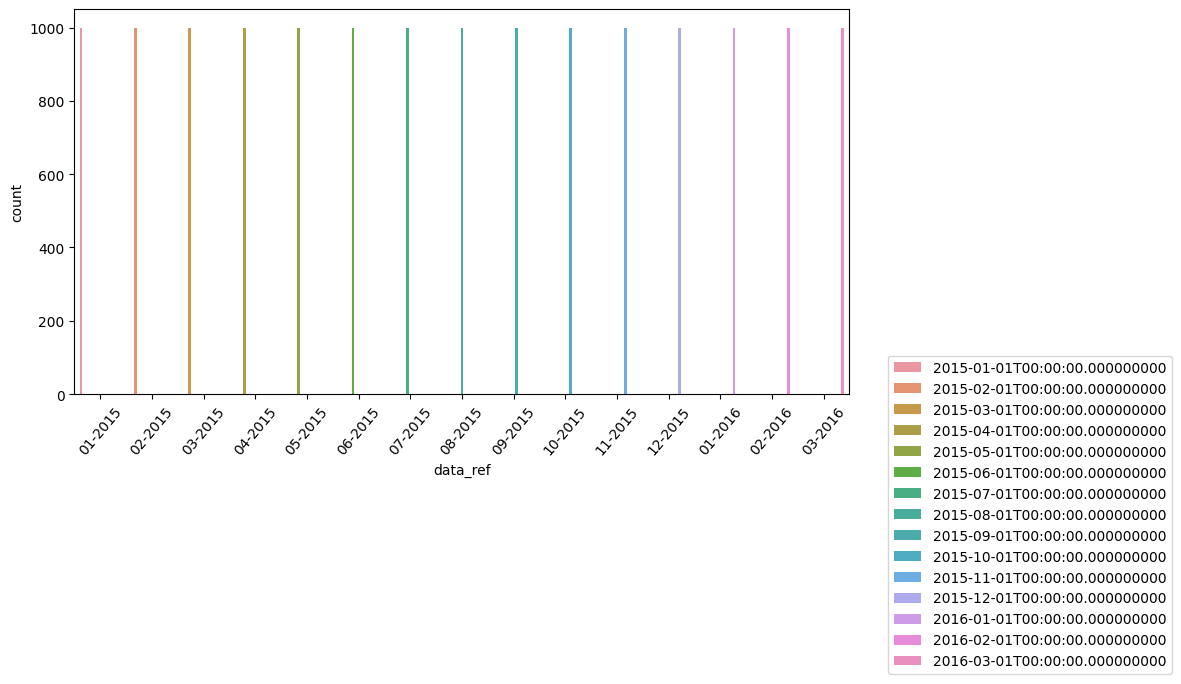

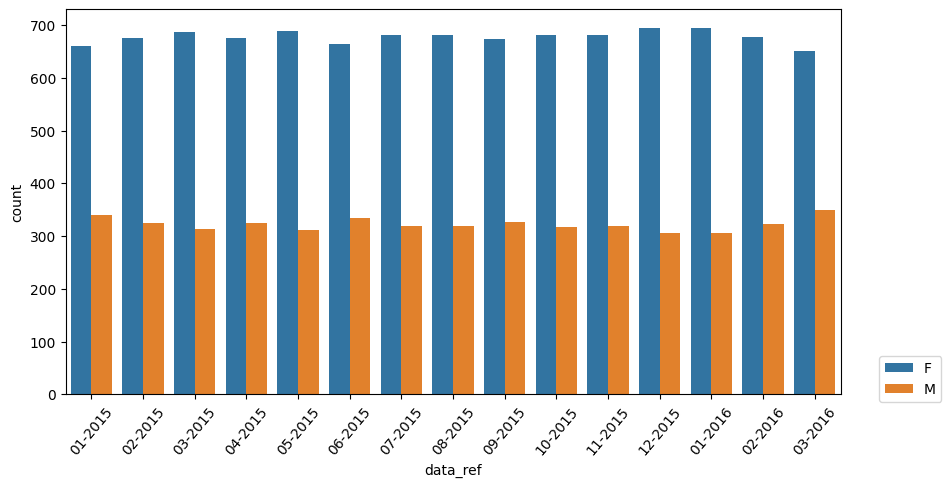

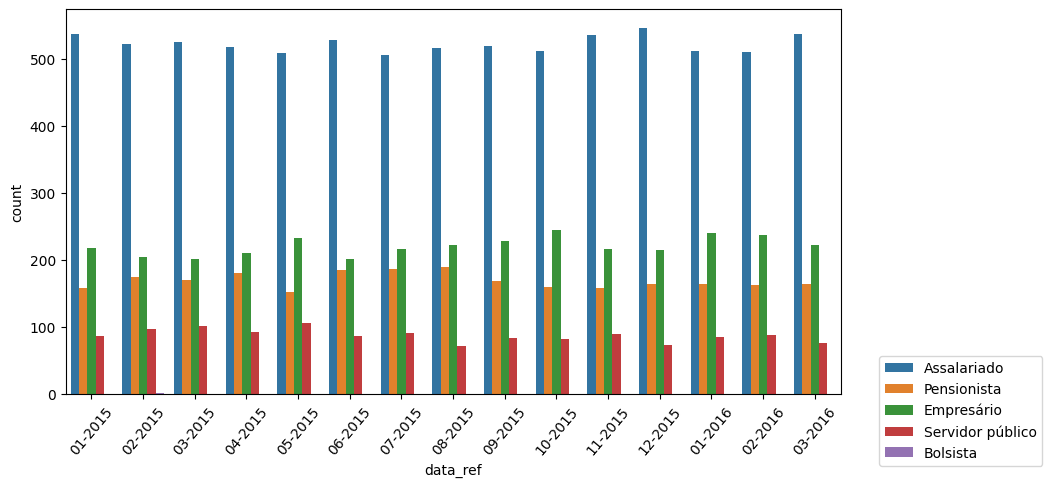

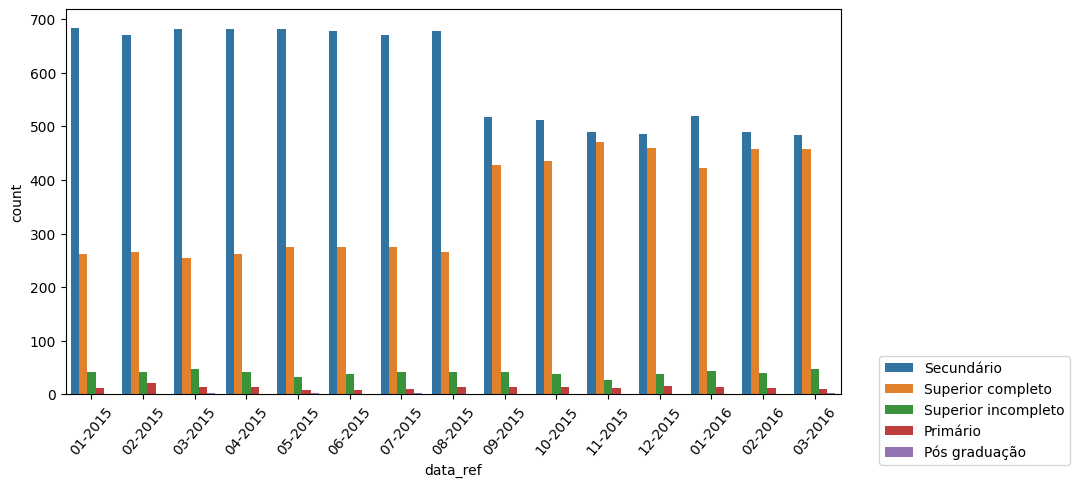

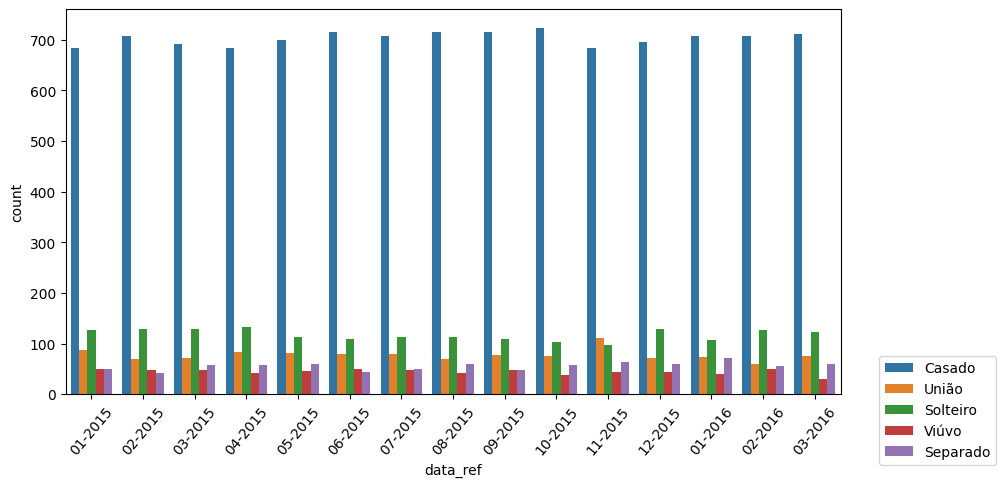

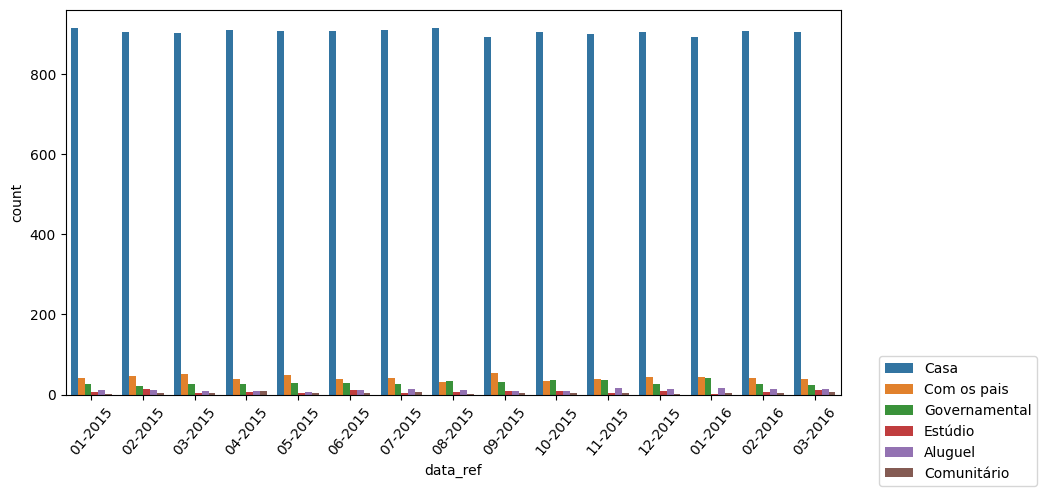

In [21]:
df.sort_values('data_ref', inplace=True)
plt.rc('figure', figsize=(10,5))

for var in varQualitativas:
    ax = sns.countplot(x='data_ref', hue=var, data=df)
    tick_labels = df['data_ref'].map(lambda x: x.strftime('%m-%Y')).unique()

    ax.set_xticks(list(range(df['data_ref'].nunique())))
    ax.set_xticklabels(tick_labels, rotation=50)

    plt.legend(bbox_to_anchor=(1.05, .1), loc='upper left', borderaxespad=0.)

    plt.show()

A partir dos gráficos obtidos é possível destacar que as variáveis 'data_ref', 'sexo', 'tipo_renda', 'estado_civil' e 'tipo_residencia' não apresentaram mudança significativa. Porém a variável 'educação' apresentou uma mudança entre agosto e setembro, tendo o número de pessoas com ensino superior completo aumentando enquanto o nível secundário teve uma queda, tais oscilações se mantendo até o março de 2016.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

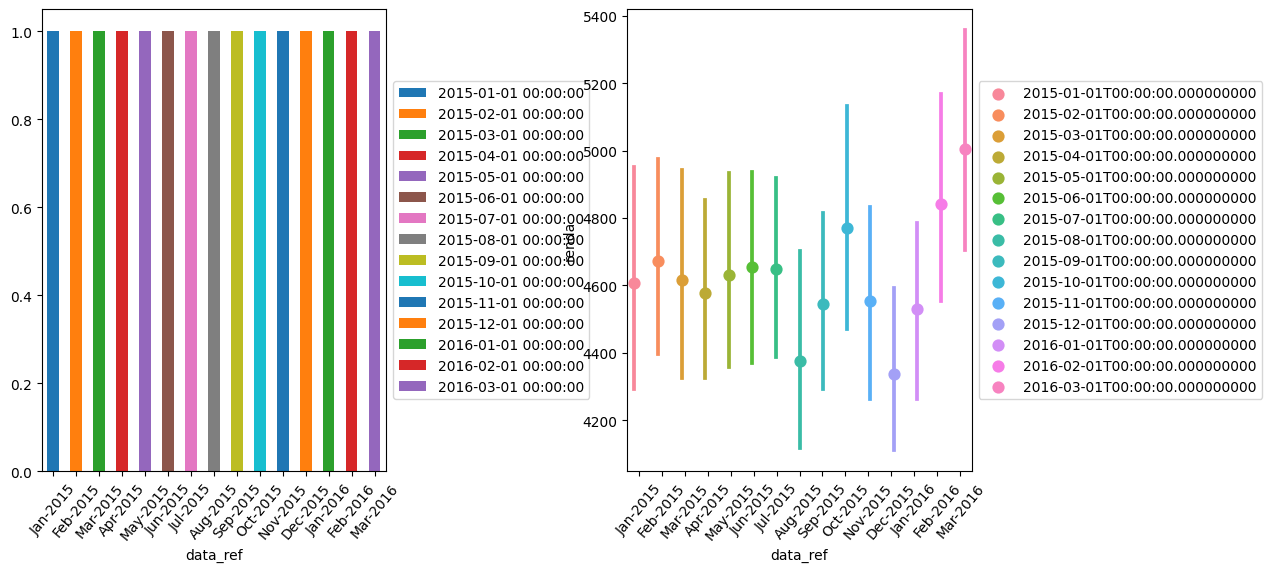

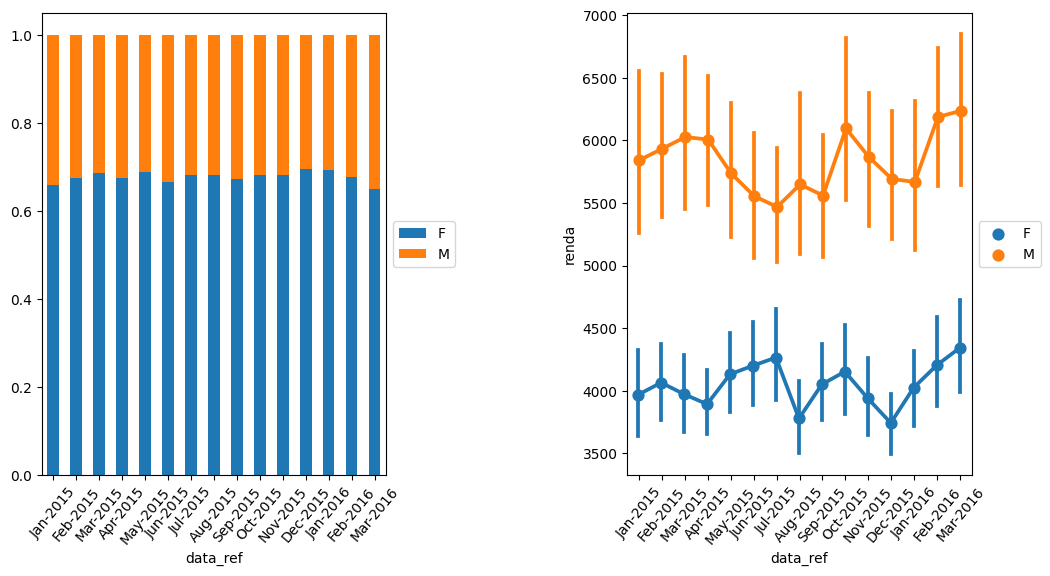

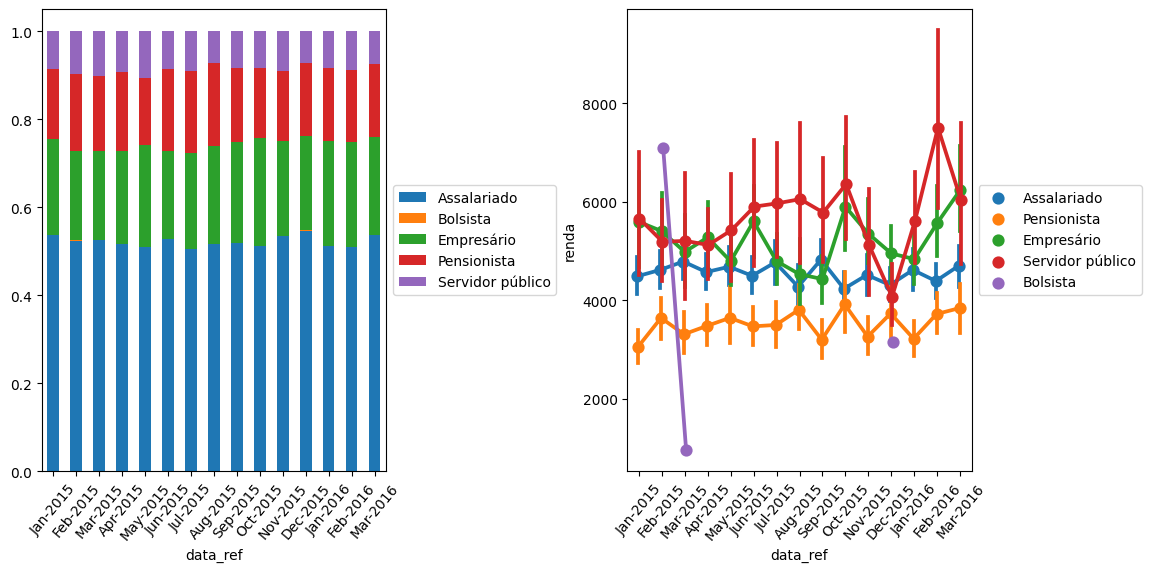

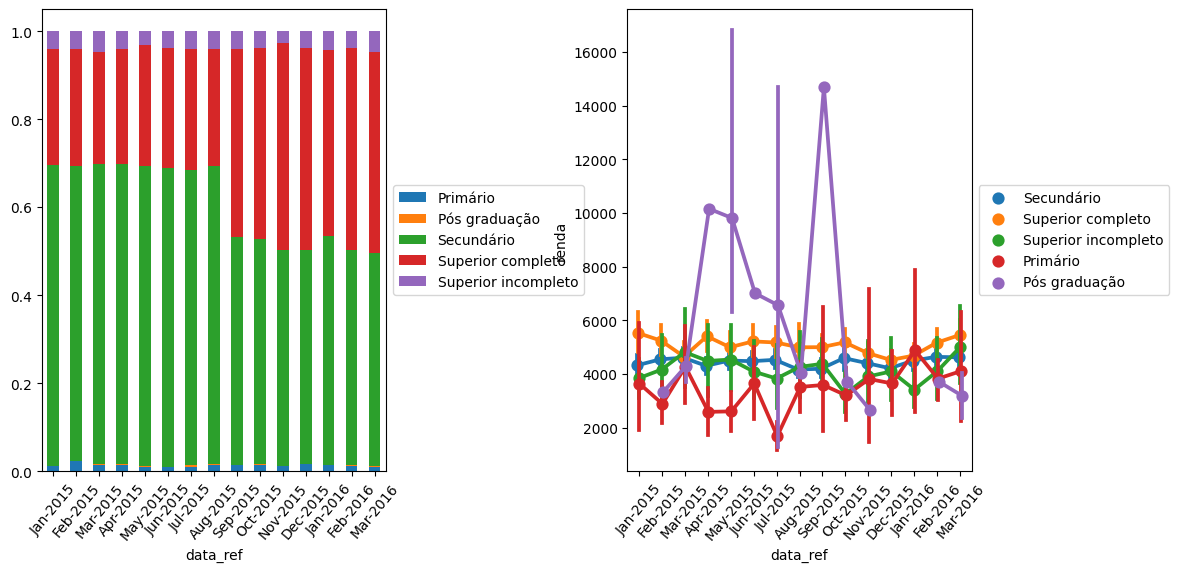

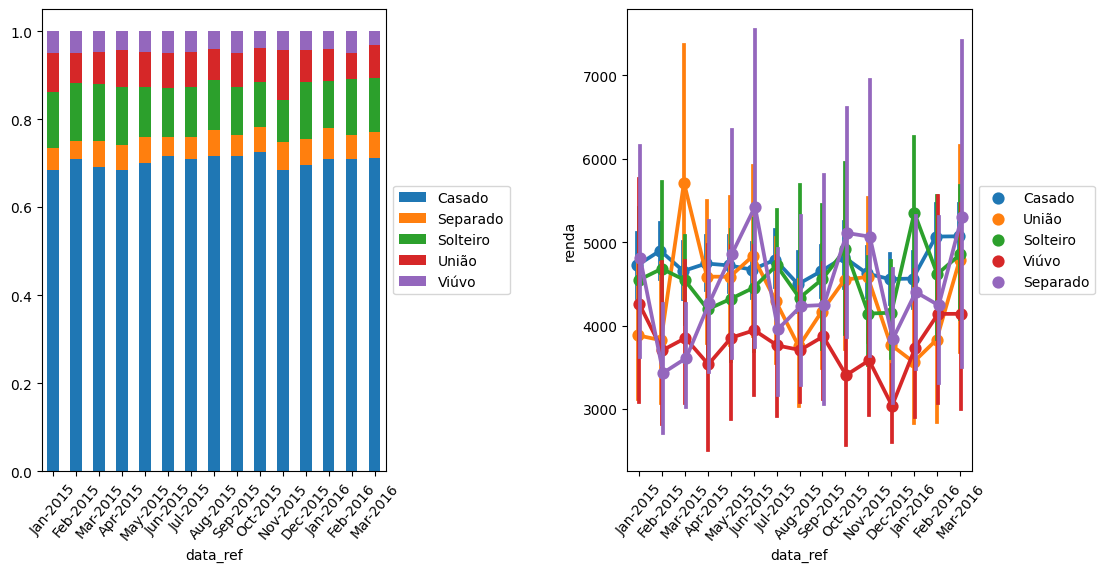

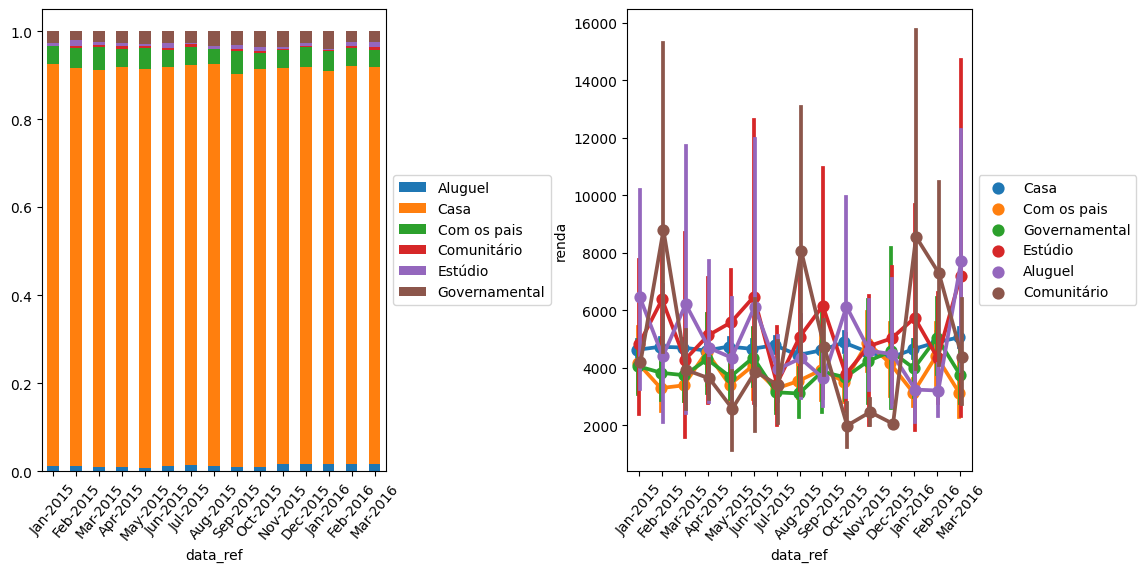

In [34]:
plt.rc('figure', figsize=(12, 6))

for var in varQualitativas:
    fig, axes = plt.subplots(1, 2)
    fig.subplots_adjust(wspace=0.7)

    tick_labels = df['data_ref'].map(lambda x: x.strftime('%b-%Y')).unique()

    # Utilizando o método de barras empilhadas:
    df_crosstab = pd.crosstab(df['data_ref'], df[var],normalize='index')
    ax = df_crosstab.plot.bar(stacked=True, ax=axes[0])
    ax.set_xticklabels(tick_labels, rotation=50)
    axes[0].legend(bbox_to_anchor=(1,.5), loc=6)

    # Utilizando o método de perfis médios no tempo:
    ax = sns.pointplot(x='data_ref', y='renda', hue=var, data=df, dodge=True, ax=axes[1])
    ax.set_xticklabels(tick_labels, rotation=50)
    axes[1].legend(bbox_to_anchor=(1,.5), loc=6)

    plt.show()

Algumas variações podem ser observadas em todas as variáveis, porém a que se sobressai continua sendo a educação com observado anteriormente.